K-means clustering on Bike sharing Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
bike_data = pd.read_csv('data.csv')
X = bike_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []

In [9]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

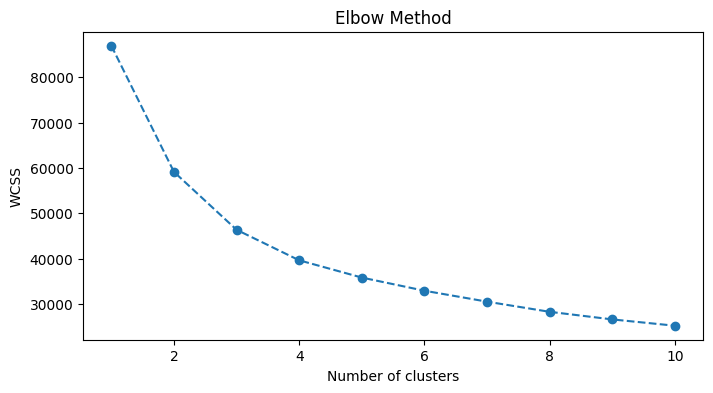

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
optimal_clusters = 3

In [12]:

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

In [13]:
bike_data['Cluster'] = cluster_labels

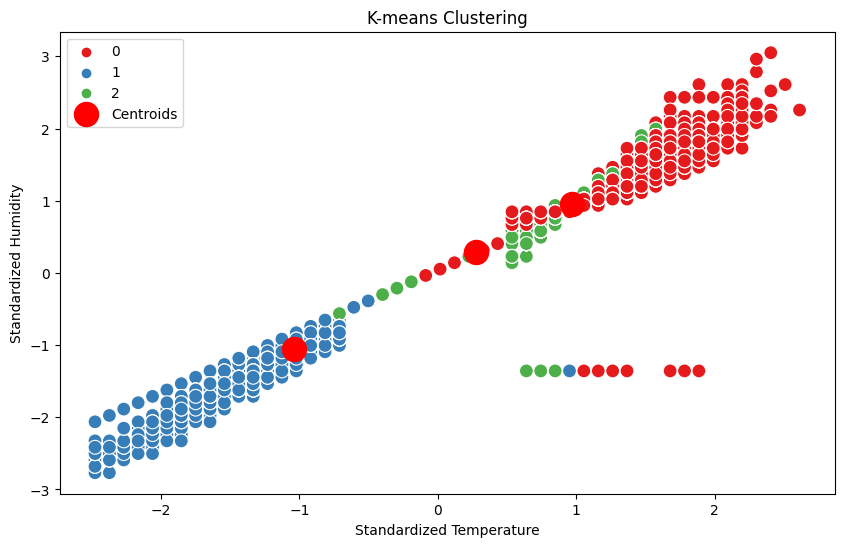

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Standardized Temperature')
plt.ylabel('Standardized Humidity')
plt.legend()
plt.show()

K-Mediods Clustering on Bike sharing dataset

In [15]:
pip install scikit-learn-extra

In [16]:
from sklearn_extra.cluster import KMedoids

In [17]:
bike_data = pd.read_csv('data.csv')
X = bike_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, max_iter=300, random_state=0)
    kmedoids.fit(X_scaled)
    wcss.append(kmedoids.inertia_)

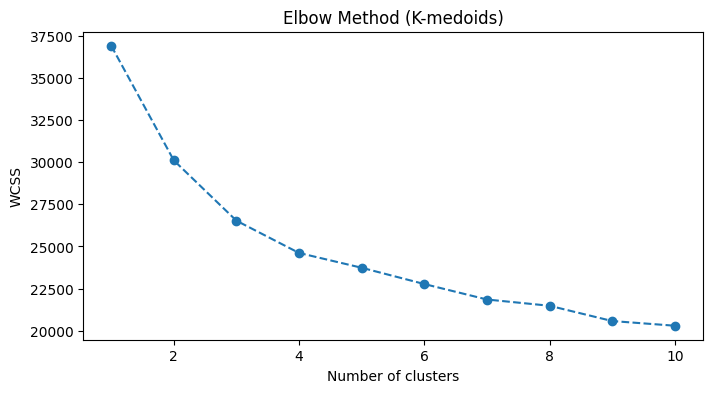

In [19]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method (K-medoids)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [20]:
optimal_clusters = 3
kmedoids = KMedoids(n_clusters=optimal_clusters, max_iter=300, random_state=0)
cluster_labels = kmedoids.fit_predict(X_scaled)

In [21]:
bike_data['Cluster'] = cluster_labels
feature1 = 'temp'
feature2 = 'hum'

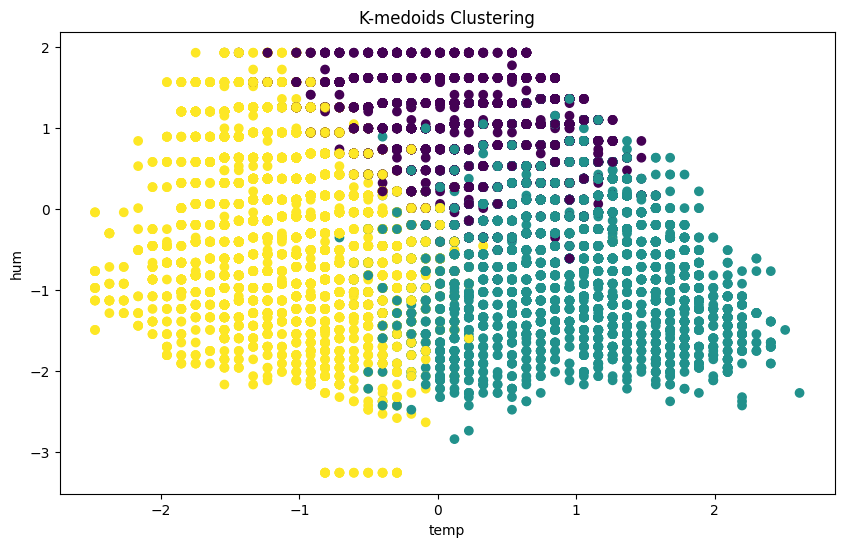

In [22]:

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, X.columns.get_loc(feature1)], X_scaled[:, X.columns.get_loc(feature2)], c=cluster_labels, cmap='viridis')
plt.title('K-medoids Clustering')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

GMM ALgorithm on Bike Sharing Dataset

In [23]:
from sklearn.mixture import GaussianMixture

In [24]:
bike_data = pd.read_csv('data.csv')
X = bike_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
bic = []
for i in range(1, 11):
    gmm = GaussianMixture(n_components=i, random_state=0)
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))

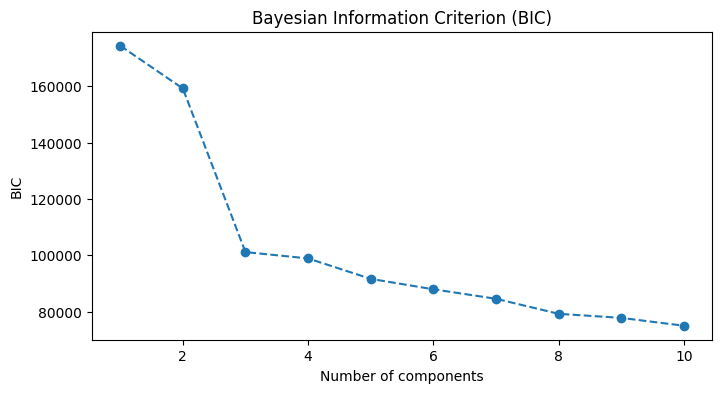

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), bic, marker='o', linestyle='--')
plt.title('Bayesian Information Criterion (BIC)')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.show()
optimal_components = 3

In [27]:
gmm = GaussianMixture(n_components=optimal_components, random_state=0)
cluster_labels = gmm.fit_predict(X_scaled)

In [28]:
bike_data['Cluster'] = cluster_labels

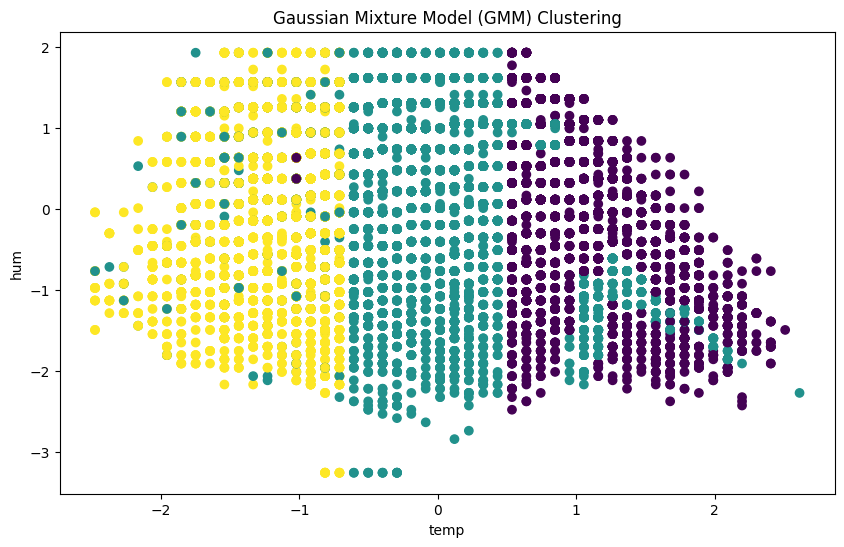

In [29]:
feature1 = 'temp'
feature2 = 'hum'

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, X.columns.get_loc(feature1)], X_scaled[:, X.columns.get_loc(feature2)], c=cluster_labels, cmap='viridis')
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

**Compare and contrast your recent clusterings (2) with the previous K-means.**


In the K-means clustering plot, there is noticeable overlap, and the data points appear to lie along a straight line.

In contrast, in the K-medoids clustering plot, the samples are more spread out, and there is less overlap among the clusters.

Similarly, in GMM (Gaussian Mixture Model) clustering, the data points are distributed more evenly, resulting in less overlap among the clusters